(0.5, 0)
(0.5, 1)
(0.5, 2)
(0.5, 3)
(0.5, 4)
(0.5, 5)
(0.5, 6)
(0.5, 7)
(0.5, 8)
(0.5, 9)
(0.5, 10)
(0.5, 11)
(0.5, 12)
(0.5, 13)
(0.5, 14)
(0.5, 15)
(20, 0)
(20, 1)
(20, 2)
(20, 3)
(20, 4)
(20, 5)
(20, 6)
(20, 7)
(20, 8)
(20, 9)
(20, 10)
(20, 11)
(20, 12)
(20, 13)
(20, 14)
(20, 15)
ffmpeg -r 2 -i tmp_tanh_movie_%05d.png -vcodec libtheora movie.ogg


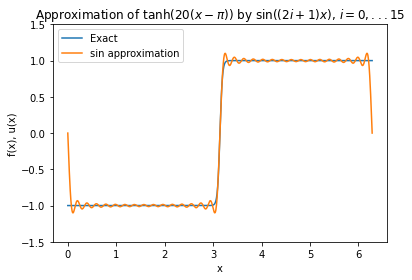

In [1]:
""" Alternative solution file."""
import matplotlib.pyplot as plt

from numpy.linalg import solve
from math import factorial
import matplotlib.pyplot as plt
import numpy as np

def least_squares_orth(f, x, psi):
    """
    Function for calculating the approximation to f.
    In order to calculate the approximation fast,
    the trapezoidal rule is used for integration
    (without boundary adjustment)."""
    # Make A matrix and b vector from least square method to find the coefficients c
    N = len(psi)
    A = np.zeros(N)
    b = np.zeros(N)
    dx = x[1]-x[0]
    for n in range(N):
        A[n] = dx*(psi[n](x)**2).sum()
        b[n] = dx*(f*psi[n](x)).sum()
    c = [b[i]/A[i] for i in range(N)]

    # Calculates the approximation u
    u = np.zeros_like(f)
    for n in range(N):
        u += c[n]*psi[n](x)
    return u


def prepare_for_plotting(x, f, legends):
    plt.ion()
    lines = plt.plot(x, f, x, f)
    plt.xlabel('x')
    plt.ylabel('f(x), u(x)')
    plt.legend(legends, loc='upper left')
    plt.ylim([-1.5, 1.5])
    return lines

def main(basis='all', boundary_correction=False, interactive=True):
    import os, time
    os.system('rm -f tmp_tanh*.png movie.ogg')
    fileformat = 'tmp_tanh_movie_%02d_%04d.png'
    fileformat = 'tmp_tanh_movie_%05d.png'
    Nx = 1000
    x = np.linspace(0, 2*np.pi, Nx) # Our domain
    s = 20                          # Steepness of the function
    f = np.tanh((x - np.pi)*s)
    lines = prepare_for_plotting(x, f, ['Exact', 'sin approximation'])

    N = 15
    frame_counter = 0
    for s in [0.5, 20]:
        f = np.tanh(s*(x-np.pi))
        lines[0].set_ydata(f)

        if boundary_correction:
            x_L = 0; x_R = 2*np.pi
            f_L = f[0]
            f_R = f[-1]
            B = ((x_R - x)*f_L + (x - x_L)*f_R)/(x_R-x_L)
        else:
            B = 0

        u = np.zeros(Nx) + B

        for i in range(N+1):
            print((s, i))
            if basis == 'all':
                psi_str = r'$\sin((i+1)x)$'
                psi_list = [lambda x: np.sin((i+1)*x)]
            else:
                psi_str = r'$\sin((2i+1)x)$'
                psi_list = [lambda x: np.sin((2*i+1)*x)]
            u +=  least_squares_orth(f-B, x, psi_list)
            lines[1].set_ydata(u)
            plt.title(r'Approximation of $\tanh(%g(x-\pi))$ by %s, $i=0,...%d$' % (s, psi_str, i))
            plt.savefig(fileformat % frame_counter)
            frame_counter += 1
            plt.draw()
            if interactive:
                input()

    cmd = 'ffmpeg -r 2 -i %s -vcodec libtheora movie.ogg' % (fileformat)
    print(cmd)
    os.system(cmd)

if __name__=='__main__':
    import sys
    try:
        basis = sys.argv[1]
        #boundary_correction = int(sys.argv[2])
        interactive = int(sys.argv[3])
    except IndexError:
        basis = 'odd'
        boundary_correction = False
        interactive = False
    main(basis=basis, boundary_correction=boundary_correction,
         interactive=interactive)




